In this project, I'll use a Dataset which is available on Kaggle.
this dataset contains images including traffic signs with labels

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import os
import shutil
from random import choice
from IPython.display import Image

In [3]:
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 15930, done.
remote: Counting objects: 100% (50/50), done.
remote: Compressing objects: 100% (41/41), done.
remote: Total 15930 (delta 23), reused 26 (delta 9), pack-reused 15880
Receiving objects: 100% (15930/15930), 14.60 MiB | 9.59 MiB/s, done.
Resolving deltas: 100% (10922/10922), done.


In [4]:
%cd yolov5

/content/yolov5


In [5]:
!pip install -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.5/188.5 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 610.8/610.8 kB 43.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.9 MB/s eta 0:00:00


In [6]:
os.mkdir('/content/data/')
shutil.copy('/content/gdrive/MyDrive/Colab Notebooks/datasets/traffic-signs-dataset-in-yolo-format.zip', '/content/data/')

'/content/data/traffic-signs-dataset-in-yolo-format.zip'

In [42]:
# %cd data
# !pwd
%cd ..

/content/yolov5


In [9]:
!unzip /content/data/traffic-signs-dataset-in-yolo-format.zip

Archive:  /content/data/traffic-signs-dataset-in-yolo-format.zip
  inflating: classes.names           
  inflating: getting-full-path.py    
  inflating: test.txt                
  inflating: traffic-sign-to-test.mp4  
  inflating: train.txt               
  inflating: ts/ts/00000.jpg         
  inflating: ts/ts/00000.txt         
  inflating: ts/ts/00001.jpg         
  inflating: ts/ts/00001.txt         
  inflating: ts/ts/00002.jpg         
  inflating: ts/ts/00002.txt         
  inflating: ts/ts/00003.jpg         
  inflating: ts/ts/00003.txt         
  inflating: ts/ts/00004.jpg         
  inflating: ts/ts/00004.txt         
  inflating: ts/ts/00005.jpg         
  inflating: ts/ts/00005.txt         
  inflating: ts/ts/00006.jpg         
  inflating: ts/ts/00006.txt         
  inflating: ts/ts/00007.jpg         
  inflating: ts/ts/00007.txt         
  inflating: ts/ts/00008.jpg         
  inflating: ts/ts/00008.txt         
  inflating: ts/ts/00009.jpg         
  inflating: ts/ts/00

In [12]:
imgs =[]
xmls =[]

train_path = '/content/yolov5/data/images/train'
val_path = '/content/yolov5/data/images/val'
source_path = '/content/yolov5/ts/ts'

if not os.path.exists(train_path):
  os.mkdir(train_path)
if not os.path.exists(val_path):
  os.mkdir(val_path)

train_ratio = 0.8
val_ratio = 0.2

#total count of imgs
totalImgCount = len(os.listdir(source_path))/2

#soring files to corresponding arrays
for (dirname, dirs, files) in os.walk(source_path):
    for filename in files:
        if filename.endswith('.txt'):
            xmls.append(filename)
        else:
            imgs.append(filename)


#counting range for cycles
countForTrain = int(len(imgs)*train_ratio)
countForVal = int(len(imgs)*val_ratio)
print("training images are : ",countForTrain)
print("Validation images are : ",countForVal)

training images are :  592
Validation images are :  148


In [14]:
os.mkdir('/content/yolov5/data/labels')

In [15]:
trainimagePath = '/content/yolov5/data/images/train'
trainlabelPath =  '/content/yolov5/data/labels/train'
valimagePath = '/content/yolov5/data/images/val'
vallabelPath = '/content/yolov5/data/labels/val'

if not os.path.exists(trainimagePath):
  os.mkdir(trainimagePath)
if not os.path.exists(trainlabelPath):
  os.mkdir(trainlabelPath)
if not os.path.exists(valimagePath):
  os.mkdir(valimagePath)
if not os.path.exists(vallabelPath):
  os.mkdir(vallabelPath)

for x in range(countForTrain):

    fileJpg = choice(imgs) # get name of random image from origin dir
    fileXml = fileJpg[:-4] +'.txt' # get name of corresponding annotation file

    #move both files into train dir
    #shutil.move(os.path.join(crsPath, fileJpg), os.path.join(trainimagePath, fileJpg))
    #shutil.move(os.path.join(crsPath, fileXml), os.path.join(trainlabelPath, fileXml))
    shutil.copy(os.path.join(source_path, fileJpg), os.path.join(trainimagePath, fileJpg))
    shutil.copy(os.path.join(source_path, fileXml), os.path.join(trainlabelPath, fileXml))


    #remove files from arrays
    imgs.remove(fileJpg)
    xmls.remove(fileXml)


#cycle for test dir
for x in range(countForVal):

    fileJpg = choice(imgs) # get name of random image from origin dir
    fileXml = fileJpg[:-4] +'.txt' # get name of corresponding annotation file

    #move both files into train dir

    shutil.copy(os.path.join(source_path, fileJpg), os.path.join(valimagePath, fileJpg))
    shutil.copy(os.path.join(source_path, fileXml), os.path.join(vallabelPath, fileXml))

    #remove files from arrays
    imgs.remove(fileJpg)
    xmls.remove(fileXml)

#rest of files will be validation files, so rename origin dir to val dir
#os.rename(crsPath, valPath)
#shutil.move(source_path, val_path)

In [16]:
shutil.copy('/content/gdrive/MyDrive/Colab Notebooks/datasets/traffic-signs.yaml','/content/yolov5/data')

'/content/yolov5/data/traffic-signs.yaml'

In [17]:
!python train.py --img 415 --batch 16 --epochs 30 --data /content/yolov5/data/traffic-signs.yaml --weights yolov5s.pt --cache

train: weights=yolov5s.pt, cfg=, data=/content/yolov5/data/traffic-signs.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=30, batch_size=16, imgsz=415, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-211-g94e943e Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.

In [20]:
!python -m pip install --upgrade pip

!pip install tensorflow

!pip install tensorboard

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 22.5 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 23.1.2
    Uninstalling pip-23.1.2:
      Successfully uninstalled pip-23.1.2


In [24]:
!kill 4589

In [25]:
%load_ext tensorboard
%tensorboard --logdir runs

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


<IPython.core.display.Javascript object>

In [31]:
shutil.copy('/content/yolov5/ts/ts/00638.txt','/content/gdrive/MyDrive/Colab Notebooks/datasets')

'/content/gdrive/MyDrive/Colab Notebooks/datasets/00638.txt'

In [35]:
!python detect.py --source '/content/gdrive/MyDrive/Colab Notebooks/datasets/00638.jpg' --weights /content/yolov5/runs/train/exp/weights/best.pt

detect: weights=['/content/yolov5/runs/train/exp/weights/best.pt'], source=/content/gdrive/MyDrive/Colab Notebooks/datasets/00638.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-211-g94e943e Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7020913 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /content/gdrive/MyDrive/Colab Notebooks/datasets/00638.jpg: 384x640 1 prohibitory, 1 danger, 45.8ms
Speed: 0.5ms pre-process, 45.8ms inference, 1.5ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp3


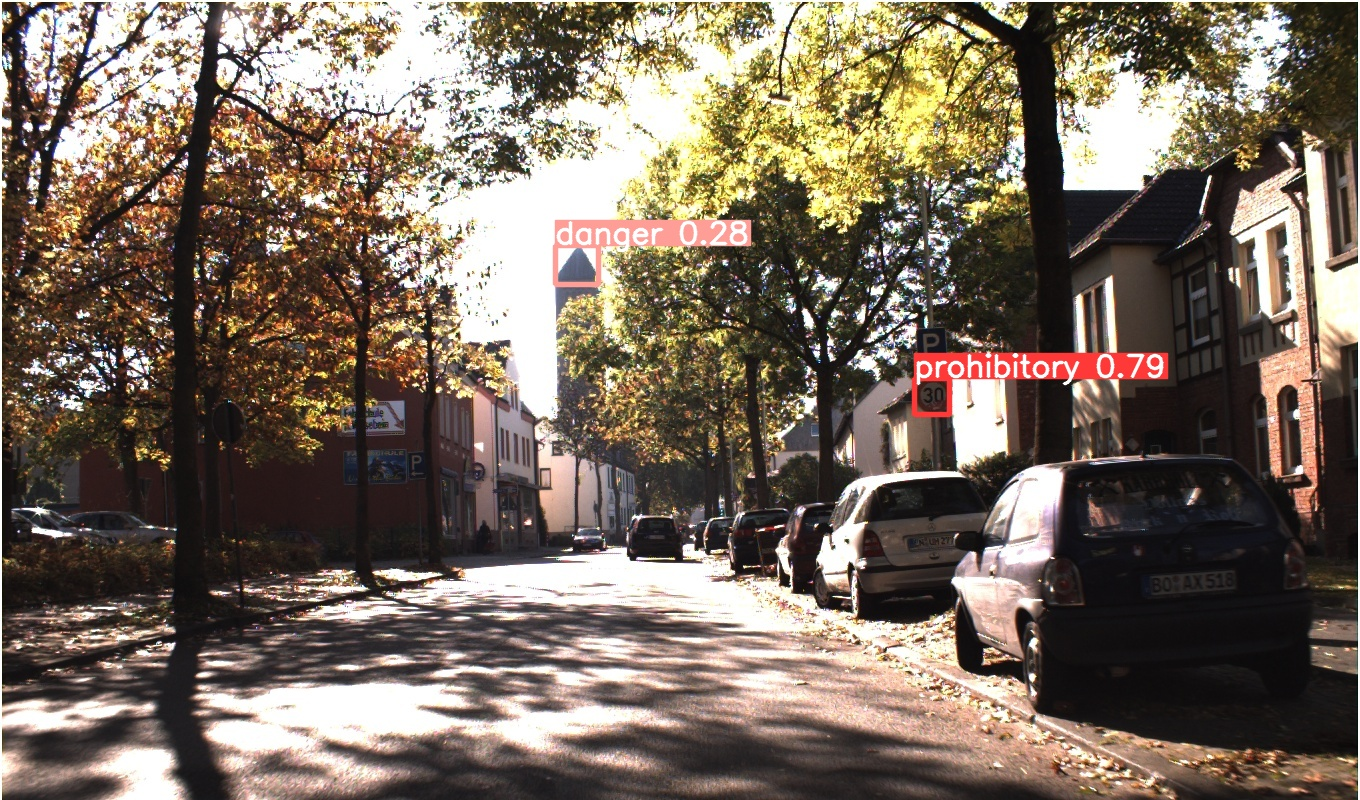

In [36]:
Image('/content/yolov5/runs/detect/exp3/00638.jpg')

In [37]:
!python train.py --img 415 --batch 16 --epochs 30 --data /content/yolov5/data/traffic-signs.yaml --weights yolov5l.pt --cache

train: weights=yolov5l.pt, cfg=, data=/content/yolov5/data/traffic-signs.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=30, batch_size=16, imgsz=415, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-211-g94e943e Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.

In [38]:
!python detect.py --source '/content/gdrive/MyDrive/Colab Notebooks/datasets/00638.jpg' --weights /content/yolov5/runs/train/exp2/weights/best.pt

detect: weights=['/content/yolov5/runs/train/exp2/weights/best.pt'], source=/content/gdrive/MyDrive/Colab Notebooks/datasets/00638.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-211-g94e943e Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 267 layers, 46124433 parameters, 0 gradients, 107.7 GFLOPs
image 1/1 /content/gdrive/MyDrive/Colab Notebooks/datasets/00638.jpg: 384x640 1 prohibitory, 80.3ms
Speed: 0.6ms pre-process, 80.3ms inference, 11.8ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp4


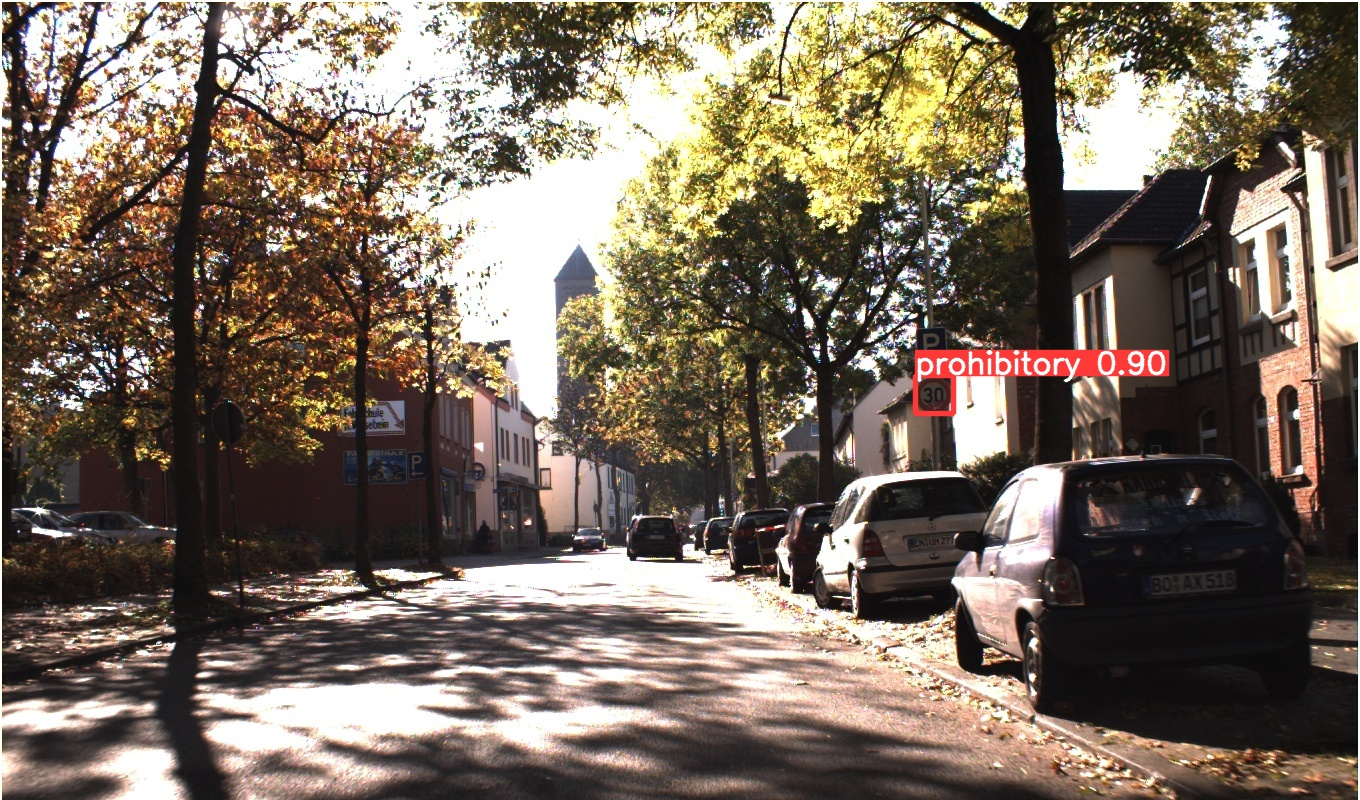

In [39]:
Image('/content/yolov5/runs/detect/exp4/00638.jpg')

In [40]:
!python detect.py --source '/content/yolov5/traffic-sign-to-test.mp4' --weights /content/yolov5/runs/train/exp2/weights/best.pt


detect: weights=['/content/yolov5/runs/train/exp2/weights/best.pt'], source=/content/yolov5/traffic-sign-to-test.mp4, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-211-g94e943e Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 267 layers, 46124433 parameters, 0 gradients, 107.7 GFLOPs
video 1/1 (1/56) /content/yolov5/traffic-sign-to-test.mp4: 384x640 2 prohibitorys, 56.0ms
video 1/1 (2/56) /content/yolov5/traffic-sign-to-test.mp4: 384x640 2 prohibitorys, 32.1ms
video 1/1 (3/56) /content/yolov5/traffic-sign-to-test.mp4: 384x640 2 prohibitorys, 32.1ms
video 1/1 (4/56) /content/yolov5/tra